#import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#insert data

In [ ]:
# training data
student = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(student,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [ ]:
# testing data
student_test = {'gmat': [590,740,680,610,710],
              'gpa': [2,3.7,3.3,2.3,3],
              'work_experience': [3,4,6,1,5],
              }

df_test = pd.DataFrame(student_test,columns= ['gmat', 'gpa','work_experience'])
df_test

,gmat,gpa,work_experience
0,590,2.0,3
1,740,3.7,4
2,680,3.3,6
3,610,2.3,1
4,710,3.0,5


# splitting data

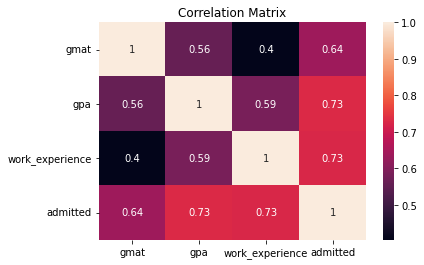

In [ ]:
# checking data correlation
plt.title('Correlation Matrix')
sns.heatmap(data = df.corr() , annot = True)
plt.show()

According to the problem, there are 3 attributes that will be independent variables or what we will further call as 'x'. And when we look at the correlation matrix above, all 3 attributes had good correlation with each surpassing 0.5 point

In [ ]:
# determine dependent and independent variables
x = df[['gmat', 'gpa', 'work_experience']].values
y = df[['admitted']].values

In [ ]:
sc = StandardScaler()
sc.fit_transform(x)

array([[ 2.07733076,  1.45200142, -0.24768082],
       [ 1.5827282 ,  1.29155928,  0.33509757],
       [ 0.59352307,  0.3289064 , -0.24768082],
       [ 0.92325811,  0.97067498,  0.91787596],
       [ 0.42865555,  1.29155928,  0.33509757],
       [ 1.25299315,  0.97067498,  1.50065435],
       [ 0.59352307, -1.27551506, -1.4132376 ],
       [ 1.08812563,  0.3289064 ,  0.33509757],
       [ 1.41786068,  0.3289064 ,  0.91787596],
       [ 0.59352307, -2.23816794, -1.4132376 ],
       [-0.72541709, -0.63374648, -0.24768082],
       [ 0.59352307,  0.97067498,  0.91787596],
       [ 0.92325811,  0.97067498,  1.50065435],
       [ 0.42865555,  0.3289064 ,  0.33509757],
       [ 1.91246324,  0.3289064 , -0.24768082],
       [-0.72541709, -0.15242004, -1.4132376 ],
       [-1.22001965, -0.63374648,  0.33509757],
       [-0.06594701,  0.97067498,  1.50065435],
       [-1.87948973, -0.63374648, -0.83045921],
       [-1.05515213, -1.27551506, -0.24768082],
       [-0.56054957,  0.3289064 , -0.830

In [ ]:
# splitting data for validation
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.25, random_state = 42, stratify = y)

we stratify data to make sure that both training and validation data has the same amount ratio of 0 and 1 on variable y

#modelling using Naive Bayesian

In [ ]:
def gaussianDist(df, x_name, x_value, y, cls):
  # make list to store mean and standard deviation
  c = list(df.columns)
  df = (df[df[y] == cls])
  mean = df[x_name].mean()
  stdev = df[x_name].std()

  # count f(x) (function for probability density)
  probDensity = (1 / (np.sqrt(2 * np.pi) * stdev)) * np.exp( - ((x_value - mean) ** 2 / (2 * stdev **2)))
  return probDensity

def classPriorProb(df, y):
  classes = sorted(list(df[y].unique()))
  prior = []
  for i in classes:
      prior.append(len(df[df[y] == i]) / len(df))
  return prior

def naiveBayesian(df, x, y):
  n_x = list(df.columns)[:-1]
  priorProb = classPriorProb(df, y)
  y_hat = []
  for p in x:
    # group to each class based on ground truth (admitted) so in this case 0 and 1, and sort the data
    cls = sorted(list(df[y].unique()))
    likelihood = [1] * len(cls)
    for q in range(len(cls)):
        for r in range(len(n_x)):
            likelihood[q] *= gaussianDist(df, n_x[r], p[r], y, cls[q])
    posteriorProb = [1] * len(cls)
    for q in range(len(cls)):
        posteriorProb[q] = likelihood[q] * priorProb[q]
    y_hat.append(np.argmax(posteriorProb))
  return np.array(y_hat)

In [ ]:
# train data
y_predicted = naiveBayesian(df, x = x_train, y = 'admitted')
y_predicted

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0])

#check model to validation data

In [ ]:
# validation data
y_validation_pred = naiveBayesian(df, x = x_validation, y = 'admitted')
y_validation_pred

#side by side comparrison
check_valid = pd.DataFrame({
    'ground truth' : y_validation.flatten(),
    'y predict' : y_validation_pred
})
check_valid

,ground truth,y predict
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


according to validation data, the result of the model is good with each of y prediction value has the same result as their respective ground truth

#evaluation

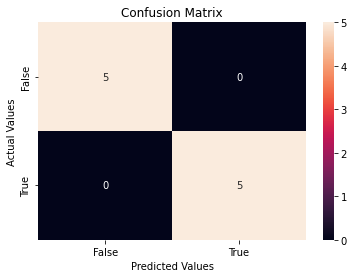

In [ ]:
# Confusion Matrix
confusionMatrix = confusion_matrix(y_validation, y_validation_pred)
cm = sns.heatmap(confusionMatrix, annot = True)
cm.set_title('Confusion Matrix')
cm.set_xlabel('Predicted Values')
cm.set_ylabel('Actual Values')
cm.xaxis.set_ticklabels(['False','True'])
cm.yaxis.set_ticklabels(['False','True'])
plt.show()

#prediction on test data

In [ ]:
x_test = df_test.values
y_predicted = naiveBayesian(df, x = x_test, y = 'admitted')
result = df_test.assign(admitted = y_predicted)
result

,gmat,gpa,work_experience,admitted
0,590,2.0,3,0
1,740,3.7,4,1
2,680,3.3,6,1
3,610,2.3,1,0
4,710,3.0,5,1
